In [1]:
%%file custom.css
body {
    font-size: 160%;
    font-family: Lato, Ariel, sans-serif !important;
}

div.slides {
    margin-top: -7%;
}

.left {
    width: 49%;
    float: left;
}

.right {
    width: 49%;
    float: right;
}

.centre {
    text-align: center;
}

h1 {
    text-align: center;
}

h2 {
    text-align: center;
}

div.prompt {
    display: none;
}

div.highlight {
    font-size: 85%; /* This Seems to give an approximate 80char line at 1024 */
}

div.output_html {
    font-size: 85%;
}

div.output_subarea {
    max-width: 100%; !important
}

div.output_png {
    text-align: center;
}

li {
    padding-top: 1em !important;
}

ul.logos {
    margin: 0px;
    padding: 0px;
    width: 100%;
}

ul.logos li {
    list-style: none;
    height:150px;

}

.output_stderr {
    display: none;
}

div.output_area .rendered_html img, div.output_area .rendered_html table {
    margin-left: auto;
    margin-right: auto;
}

Overwriting custom.css


In [2]:
from mayavi import mlab
from mayavi.tools.sources import vector_field, scalar_field
mlab.options.offscreen = True

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.units as u
import sunpy.map

import yt
import pysac.yt

%matplotlib inline

font_size = 20
pgf_with_latex = {
    "font.size": font_size,
    "axes.labelsize": font_size,  # LaTeX default is 10pt font.
    "legend.fontsize":font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    }

matplotlib.rcParams.update(pgf_with_latex)

# Simulations of Magnetohydrodynamic Waves Driven by Photospheric Motions

Stuart J. Mumford

Supervisor: Robertus Erdélyi

Solar Physics & Space Plasma Research Centre (SP2RC), School of Mathematics and Statistics, The University of Sheffield

<img style='float: right; width: 30%; margin-top: 90px;' src='images/TUOS_Logo_CMYK_Keyline.svg'/> 
<img style='float: right; width: 30%; margin-top: 60px; margin-right: 110px;' src='images/swat_logo.svg'/> 
<img style='float: left; width: 25%;' src='images/SP2RC_v6_plain.svg'/>

# My Publications

<b>Mumford, S. J.</b> and  Erdélyi, R. - Monthly Noticies of the Royal Astronomical Society - March 2015 - Volume 449 Issue 2. <br />
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2015arXiv150101871M/" target="blank_"> Photospheric Logarithmic Velocity Spirals as MHD Wave Generation Mechanisms</a>


<b>Mumford, S. J.</b>, Fedun, V., Erdélyi, R. - The Astrophysical Journal -  January 2015 - Volume 799, Issue 1 <br/>
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2013arXiv1305.7415M/"
target="blank_" class="papertitle">Generation of Magnetohydrodynamic Waves in Low Solar
 Atmospheric Flux Tubes by Photospheric Motions</a>
 

The SunPy Community, <b>Mumford, S. J.</b>, Christe, S., Pérez-Suárez, D., et. al - Computational Science and Discovery - January 2015 - Volume 8 Issue 1.<br/>
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2015CS%26D....8a4009S/" target="blank_">SunPy: Python for Solar Physics</a>


Freij N., Scullion E. M., Nelson C. J., <b>Mumford S. J.</b>, Wedemeyer S., and Erdélyi R. - The Astrophysical Journal - July 2014 - Volume 791, Issue 1, p.61 <br />
<a href="http://labs.adsabs.harvard.edu/adsabs/abs/2014ApJ...791...61F/" target="_blank">The Detection of Upwardly Propagating Waves Channeling Energy from the Chromosphere to the Low Corona</a>


Gent, F. A., Fedun, V., <b>Mumford, S. J.</b>, Erdélyi, R. - Monthly Notices of the Royal Astronomical Society - October 2013 - Volume 435, Issue 1, p.689-697 <br />
<a href="http://labs.adsabs.harvard.edu/ui/abs/2013MNRAS.435..689G" target="_blank">Magnetohydrostatic equilibrium - I. Three-dimensional open magnetic flux tube in the stratified solar atmosphere</a>

Nelson, C. J., Doyle, J. G., Erdélyi, R., Huang, Z., Madjarska, M. S., Mathioudakis, M., <b>Mumford, S. J.</b>, Reardon, K - Solar Physics - April 2013 - Volume 283, Issue 2, p.307-323. <br />
<a href="http://labs.adsabs.harvard.edu/ui/abs/2013SoPh..283..307N"
target="_blank" class="papertitle">Statistical Analysis of Small Ellerman Bomb Events</a>


# Problem - Coronal Heating
<br />

<div class='left'>

<p>
The solar atmosphere is too hot when compared to known energy input.

What are the unknown heating mechanisms?
</p>

<ul>
<li>
Magnetic Reconnection
</li>
<li>
Magnetohydrodynamic (MHD) Waves
</li>
</ul>
</div>

<div class='right'>

<img width=100% src="./images/f_211_193_171pfss_2048.jpg"/>

</div>

# Heating by MHD Waves


- Waves generated in high-energy low atmosphere.
- Wave propagate through the atmosphere, along magnetic field lines.
- Waves deposit energy higher in the atmosphere.

The mechanism by which the wave energy is converted into atmospheric heating in the high atmosphere is unknown, but the properties of the wave behavior is dependant on the wave mode.


## How are these waves generated and what are their properties?

# Numerical Simulations of the low-atmosphere

## The Code

The code used is the Sheffield Advanced Code (SAC) <cite data-cite="1226750/9AMFKPUF"></cite>(Shelyag, Fedun, and Erdélyi 2008). 

SAC simulates pertabations on a static background, using a CD4 solver with hyper-diffusion and hyper-viscosity terms to stabalise the solution.

This makes it well suited to solving wave pertubations on top of a highly stratified background such as the solar atmosphere.

## The Model

To simulate wave excitation in the photosphere a numerical model of the solar atmosphere is needed.

Hydrostatic background from the VAL 3C model <cite data-cite="1226750/45U23R6J"></cite>(Vernazza, Avrett, and Loeser 1981):

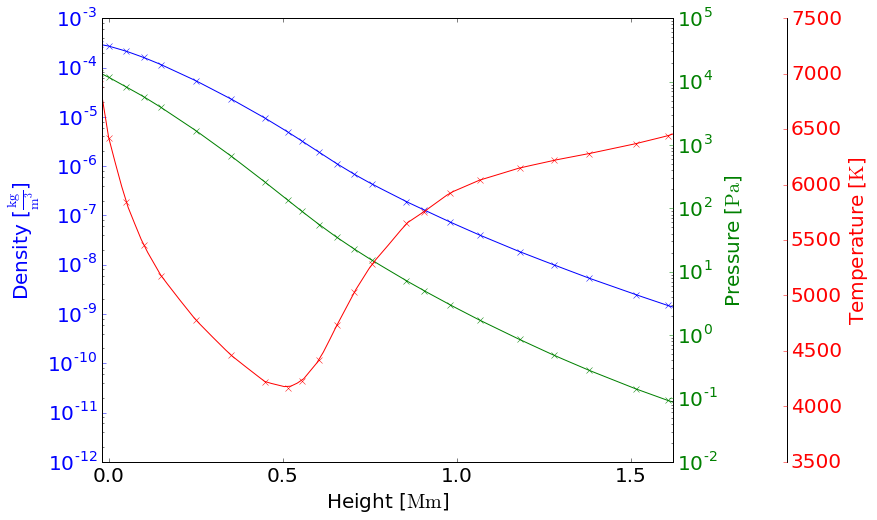

In [3]:
import pysac.mhs_atmosphere as atm

#Read in the VAL3C model
empirical_data = atm.hs_atmosphere.read_VAL3c_MTW(MTW_file=False)


# Create a Z array at the interpolated resolution and interpolate.
ZZ = u.Quantity(np.linspace(empirical_data['Z'][0], empirical_data['Z'][-1], 128), unit=empirical_data['Z'].unit)
table = atm.hs_atmosphere.interpolate_atmosphere(empirical_data, ZZ, s=0)


# Create a figure and make space for the axes.
fig, ax = plt.subplots(gridspec_kw={'right':0.77, 'left':0.16, 'bottom':0.13}, figsize=(13,8))

# Shortcut all the Mm conversion.
Z = empirical_data['Z'].to(u.Mm)

lrho, = ax.plot(Z, empirical_data['rho'].quantity.si, 'x', color='blue')
lrho_i, = ax.plot(ZZ.to(u.Mm), table['rho'].quantity.si, color='blue')

ax2 = ax.twinx()
lp, = ax2.plot(Z, empirical_data['p'].to(u.Pa), 'x', color='green')
lp_i, = ax2.plot(ZZ.to(u.Mm), table['p'].to(u.Pa), color='green')


ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
lt, = ax3.plot(Z, empirical_data['T'].to(u.K), 'x', color='red')
lt_i, = ax3.plot(ZZ.to(u.Mm), table['T'].to(u.K), color='red')


# Set primary axes properties and labels
ax.semilogy()
ax.set_ylabel(r"Density [{}]".format(lrho._yorig.unit._repr_latex_()))
ax.set_xlabel(r"Height [{}]".format(lrho._xorig.unit._repr_latex_()))
ax.set_xlim(Z[0].value-0.1, Z[-1].value+0.1)


# Pressure Axis
ax2.semilogy()
ax2.set_ylabel(r"Pressure [{}]".format(lp._yorig.unit._repr_latex_()))


# Temp axis
ax3.set_ylabel(r"Temperature [{}]".format(lt._yorig.unit._repr_latex_()))

ax.set_xlim([-0.02,1.62])
ax3.set_ylim([3500,7500])
# Set the colours for the ticks and the labels.
ax.tick_params(axis='y', colors=lrho.get_color())
ax2.tick_params(axis='y', colors=lp.get_color())
ax3.tick_params(axis='y', colors=lt.get_color())

ax.yaxis.label.set_color(lrho.get_color())
ax2.yaxis.label.set_color(lp.get_color())
ax3.yaxis.label.set_color(lt.get_color())
fig

In [4]:
from pysac.mhs_atmosphere.parameters.model_pars import mfe_setup as model_pars
import pysac.mhs_atmosphere as atm

# Cheeky Reset to Photosphere
model_pars['xyz'][4] = 0*u.Mm
#==============================================================================
# Build the MFE flux tube model using pysac
#==============================================================================
# model setup
scales, physical_constants = atm.units_const.get_parameters()
option_pars = atm.options.set_options(model_pars, False, l_gdf=True)
coords = atm.model_pars.get_coords(model_pars['Nxyz'], u.Quantity(model_pars['xyz']))

#interpolate the hs 1D profiles from empirical data source[s]
empirical_data = atm.hs_atmosphere.read_VAL3c_MTW(mu=physical_constants['mu'])
table = atm.hs_atmosphere.interpolate_atmosphere(empirical_data, coords['Zext'])
table['rho'] += table['rho'].min()*3.6

# calculate 1d hydrostatic balance from empirical density profile
# the hs pressure balance is enhanced by pressure equivalent to the
# residual mean coronal magnetic pressure contribution once the magnetic
# field has been applied
magp_meanz = np.ones(len(coords['Z'])) * u.one
magp_meanz *= model_pars['pBplus']**2/(2*physical_constants['mu0'])

# Make the vertical profile 3D
pressure_z, rho_z, Rgas_z = atm.hs_atmosphere.vertical_profile(coords['Z'], table, magp_meanz,
                                                               physical_constants, coords['dz'])

# Generate 3D coordinate arrays
x, y, z = u.Quantity(np.mgrid[coords['xmin']:coords['xmax']:1j*model_pars['Nxyz'][0],
                              coords['ymin']:coords['ymax']:1j*model_pars['Nxyz'][1],
                              coords['zmin']:coords['zmax']:1j*model_pars['Nxyz'][2]], unit=coords['xmin'].unit)

# Get default MFE flux tube parameters out of pysac
xi, yi, Si = atm.flux_tubes.get_flux_tubes(model_pars, coords, option_pars)

# Generate the 3D magnetic field
allmag = atm.flux_tubes.construct_magnetic_field(x, y, z, xi[0], yi[0], Si[0], model_pars, option_pars,
                                                 physical_constants, scales)
pressure_m, rho_m, Bx, By ,Bz, Btensx, Btensy = allmag

# local proc 3D mhs arrays
pressure, rho = atm.mhs_3D.mhs_3D_profile(z, pressure_z, rho_z, pressure_m, rho_m)
magp = (Bx**2 + By**2 + Bz**2) / (2.*physical_constants['mu0'])
energy = atm.mhs_3D.get_internal_energy(pressure, magp, physical_constants)

#### YT STUFF ####

magnetic_field_x = lambda field, data: data['mag_field_x']
yt.add_field(("gas","magnetic_field_x"), function=magnetic_field_x, units=yt.units.T.units)
magnetic_field_y = lambda field, data: data['mag_field_y']
yt.add_field(("gas","magnetic_field_y"), function=magnetic_field_y, units=yt.units.T.units)
magnetic_field_z = lambda field, data: data['mag_field_z']
yt.add_field(("gas","magnetic_field_z"), function=magnetic_field_z, units=yt.units.T.units)

# Add derived Fields
def magnetic_field_strength(field, data):
    return np.sqrt(data["mag_field_x"]**2 + data["mag_field_y"]**2 + data["mag_field_z"]**2)
yt.add_field(("gas","magnetic_field_strength"), function=magnetic_field_strength, units=yt.units.T.units)

#def alfven_speed(field, data):
#    return np.sqrt(2.*data['magnetic_pressure']/data['density'])
#yt.add_field(("gas","alfven_speed"), function=alfven_speed, units=(yt.units.m/yt.units.s).units)

bbox = u.Quantity([u.Quantity([coords['xmin'], coords['xmax']]),
                   u.Quantity([coords['ymin'], coords['ymax']]),
                   u.Quantity([coords['zmin'], coords['zmax']])]).to(u.m).value

# Now build a yt DataSet with the generated data:
data = {'mag_field_x':yt.YTQuantity.from_astropy(Bx.decompose()),
        'mag_field_y':yt.YTQuantity.from_astropy(By.decompose()),
        'mag_field_z':yt.YTQuantity.from_astropy(Bz.decompose()),
        'pressure': yt.YTQuantity.from_astropy(pressure.decompose()),
        'magnetic_pressure': yt.YTQuantity.from_astropy(magp.decompose()),
        'density': yt.YTQuantity.from_astropy(rho.decompose())}

ds = yt.load_uniform_grid(data, x.shape, length_unit='m', magnetic_unit='T',
                          mass_unit='kg', periodicity=[False]*3, bbox=bbox)

/home/stuart/GitHub/SWAT/pysac/pysac/mhs_atmosphere/mhs_model/flux_tubes.py:312: Warning: pbbal.max() = -0.111891563752 kg / (m s2)
  warnings.warn("pbbal.max() = {}".format(pbbal.max().decompose()), Warning)
yt : [INFO     ] 2015-11-29 15:06:18,212 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-11-29 15:06:18,213 Parameters: domain_dimensions         = [129 129 128]
yt : [INFO     ] 2015-11-29 15:06:18,214 Parameters: domain_left_edge          = [-1000000. -1000000.        0.]
yt : [INFO     ] 2015-11-29 15:06:18,216 Parameters: domain_right_edge         = [ 1000000.   1000000.   1587786.3]
yt : [INFO     ] 2015-11-29 15:06:18,218 Parameters: cosmological_simulation   = 0.0


## The Magnetic Flux Tube

The magnetic field model follows <cite data-cite="1226750/4CKVZT29"></cite>(Gent et al. 2013) and is constructed as a self-similar, cylindrically symmetric, expanding field.

yt : [INFO     ] 2015-11-29 15:06:18,318 Loading field plugins.
yt : [INFO     ] 2015-11-29 15:06:18,318 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,319 Loaded astro (15 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,320 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,324 Loaded fluid (63 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,325 Loaded fluid_vector (95 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,326 Loaded geometric (111 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,327 Loaded local (115 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,327 Loaded magnetic_field (121 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,328 Loaded my_plugins (121 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,329 Loaded species (123 new fields)
yt : [INFO     ] 2015-11-29 15:06:18,830 xlim = -1000000.000000 1000000.000000
yt : [INFO     ] 2015-11-29 15:06:18,831 ylim = 0.000000 1587786.300000
yt : [INFO     ] 2015-11-29 15:06:18,83


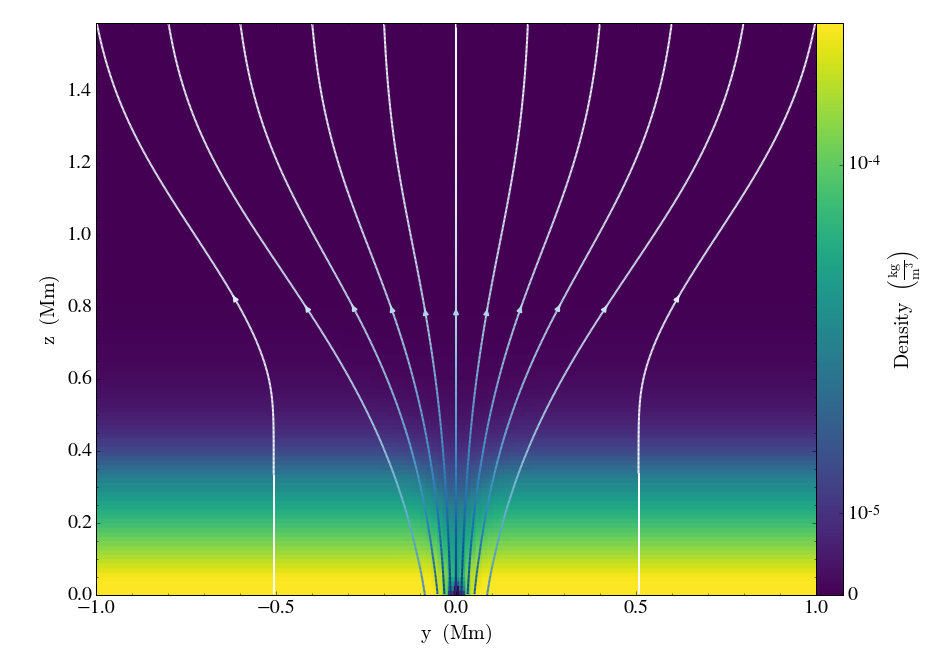

In [5]:
slc = yt.SlicePlot(ds, 'x', 'density', origin='lower-center-domain', axes_unit='Mm')
slc.set_figure_size(10)
slc.set_cmap('all', 'viridis')
slc.set_font_size(20)
slc.set_zlim('all', 0, 2.5e-4)


seed_points = np.zeros([11,2]) + 1.52
seed_points[:,0] = np.linspace(-0.99, 0.95, seed_points.shape[0], endpoint=True)
slc.annotate_streamlines('mag_field_y', 'mag_field_z', field_color='magnetic_field_strength',
plot_args={'start_points':seed_points, 'density':15, 'cmap':'Blues', 'linewidth':2,
'norm': matplotlib.colors.LogNorm(*ds.all_data().quantities.extrema("magnetic_field_strength"))})

# Exciting Waves in the Photosphere

In [6]:
x_range, y_range = [-300, 300]*u.arcsec, [-250, 250]*u.arcsec

plt.ioff()
fig = plt.figure(dpi=50, figsize=(11,8))
mm = sunpy.map.Map('./gband_data/Gband_cospatial_cotemporal_00000.fits').submap(x_range, y_range)
mm = mm.submap([-440,440]*u.arcsec, [-440,440]*u.arcsec)
mm.plot_settings['cmap'] = 'gray'
mm.plot_settings['title'] = ''
im = mm.plot()
fig.savefig('./images/gband-plot.png', transparent=True)

<div class='left'>

<p>
The dynamic photosphere with embedded magnetic field provides many potential ways of driving MHD waves.
</p>
<ul>
<li>
'Buffeting'
</li>
<li>
Convective motions (vertically).
</li>
<li>
Spiralling in downdrafts.
</li>
</ul>

</div>

<div class='right'>

<img width=100% src="./images/gband-plot.png"/>

</div>

# Driving Waves in the Simulation Domain

$$
V(x,y,z) = F(x,y,z) \ e^{-\left(\frac{z^2}{\Delta z^2} + \frac{x^2}{\Delta x^2} + \frac{y^2}{\Delta y^2}\right)} \sin \left(2\pi \frac{t}{P}\right)
$$

![](./images/domain_schematic.png)

# Identifying Waves from Broadband Drivers

Photospheric drivers excite multiple wave modes simulatenously.

How to quantify the relative strengths of the different modes from different drivers.

<br />
**Assume uniform media:**

- Decompose pertubations into Fast, Slow and Alfvén modes.
- Compare the percentage wave energy in each mode.

In [7]:
#Define tvtk notebook viewer
from IPython.core.display import Image
import subprocess
def mlab_view(scene, azimuth=153, elevation=62, distance=400, focalpoint=np.array([  25.,   63.,  60.]), aa=16):
    scene.anti_aliasing_frames = aa
    mlab.view(azimuth=azimuth, elevation=elevation, distance=distance, focalpoint=focalpoint)
    scene.save('offscreen.png', size=(750, 750))
    subprocess.Popen(["convert", "offscreen.png", "-transparent", "white", "offscreen2.png"])
    return Image(filename='offscreen2.png') 

## Relationship between Mode and Velocity Pertubation

*some maths goes here*

# Decomposing Velocity Pertubation in SAC

In [8]:
ds = pysac.yt.SACGDFDataset('Slog_p240-0_A10_B005_00001.gdf')

yt : [WARNING  ] 2015-11-29 15:06:22,066 'field_units' was overridden by 'dataset_units/density_bg'
yt : [WARNING  ] 2015-11-29 15:06:22,067 'field_units' was overridden by 'dataset_units/density_pert'
yt : [WARNING  ] 2015-11-29 15:06:22,071 'field_units' was overridden by 'dataset_units/internal_energy_bg'
yt : [WARNING  ] 2015-11-29 15:06:22,073 'field_units' was overridden by 'dataset_units/internal_energy_pert'
yt : [WARNING  ] 2015-11-29 15:06:22,076 'field_units' was overridden by 'dataset_units/mag_field_x_bg'
yt : [WARNING  ] 2015-11-29 15:06:22,077 'field_units' was overridden by 'dataset_units/mag_field_x_pert'
yt : [WARNING  ] 2015-11-29 15:06:22,078 'field_units' was overridden by 'dataset_units/mag_field_y_bg'
yt : [WARNING  ] 2015-11-29 15:06:22,079 'field_units' was overridden by 'dataset_units/mag_field_y_pert'
yt : [WARNING  ] 2015-11-29 15:06:22,081 'field_units' was overridden by 'dataset_units/mag_field_z_bg'
yt : [WARNING  ] 2015-11-29 15:06:22,083 'field_units' w

In [9]:
from tvtk.api import tvtk

#pysac imports
import pysac.yt
import pysac.analysis.tube3D.tvtk_tube_functions as ttf
import pysac.plot.mayavi_plotting_functions as mpf
from pysac.plot.mayavi_seed_streamlines import SeedStreamline
from pysac.plot.divergingcolourmaps import get_mayavi_colourmap
from pysac.analysis.tube3D.process_utils import get_yt_mlab

### Load in and Config ###

# loaded above
ds = pysac.yt.SACGDFDataset('Slog_p240-0_A10_B005_00001.gdf')
tube_r = 60

#if running this creates a persistant window just get it out of the way!
mlab.options.offscreen = True
fig = mlab.figure(bgcolor=(1, 1, 1))

cg = ds.index.grids[0]

#Slices
cube_slice = np.s_[:,:,:-5]
x_slice = np.s_[:,:,:,:-5]

#Define the size of the domain
xmax, ymax, zmax = np.array(cg['density'].to_ndarray()[cube_slice].shape) - 1
domain = {'xmax':xmax, 'ymax':ymax, 'zmax':zmax}

bfield, vfield = get_yt_mlab(ds, cube_slice, flux=False)

#Create a scalar field of the magntiude of the vector field
bmag = mlab.pipeline.extract_vector_norm(bfield, name="Field line Normals")

yt : [INFO     ] 2015-11-29 15:06:22,379 Loading field plugins.
yt : [INFO     ] 2015-11-29 15:06:22,380 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,380 Loaded astro (15 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,381 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,388 Loaded fluid (63 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,390 Loaded fluid_vector (95 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,392 Loaded geometric (111 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,393 Loaded local (115 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,394 Loaded magnetic_field (120 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,395 Loaded my_plugins (120 new fields)
yt : [INFO     ] 2015-11-29 15:06:22,397 Loaded species (122 new fields)


/opt/miniconda/envs/thesis/lib/python2.7/site-packages/mayavi/tools/camera.py:288: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if focalpoint is not None and not focalpoint == 'auto':


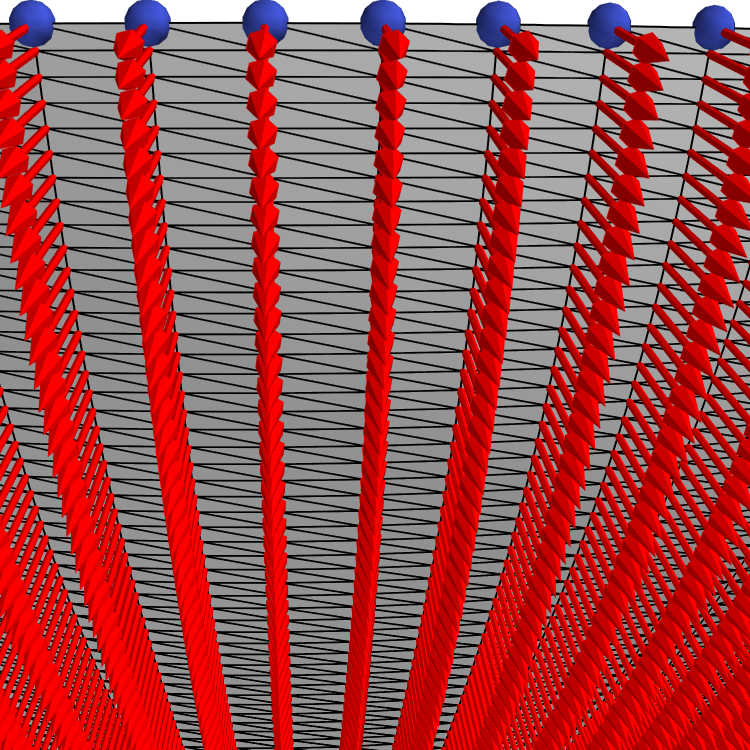

In [10]:
xc = domain['xmax']/2
yc = domain['ymax']/2
ti = 0
n = 100

surf_seeds = []
for theta in np.linspace(0, 2 * np.pi, n, endpoint=False):
    surf_seeds.append([tube_r * np.cos(theta + 0.5 * ti) + xc,
    tube_r * np.sin(theta + 0.5 * ti) + yc, domain['zmax']])

seeds = np.array(surf_seeds)
#Add axes:
axes, outline = mpf.add_axes(np.array(zip(ds.domain_left_edge,ds.domain_right_edge)).flatten()/1e8)

#Add seed points to plot:
seed_points = mlab.points3d(seeds[:,0], seeds[:,1], seeds[:,2],
color=(0.231, 0.298, 0.752), scale_mode='none',
scale_factor=1.5)

mlab_view(fig.scene)

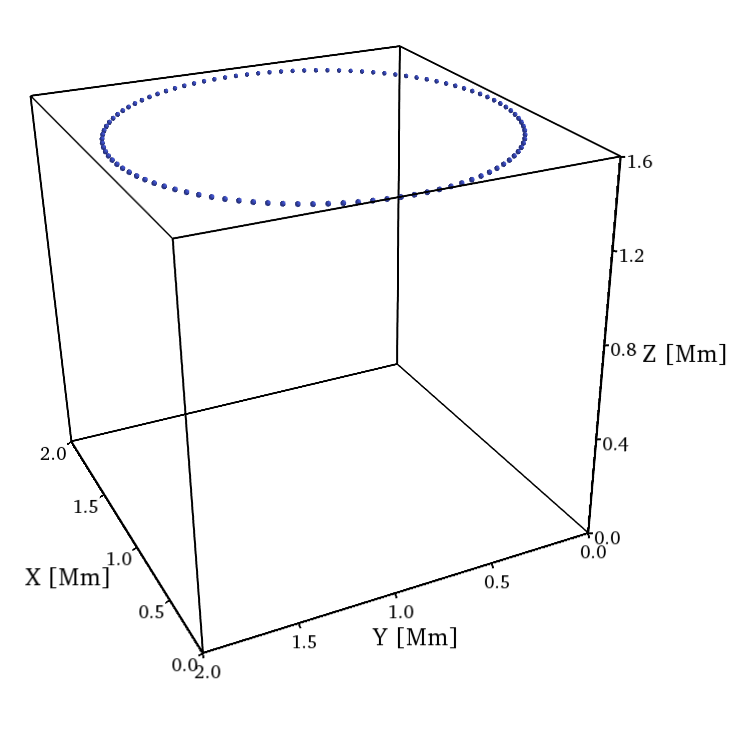

In [11]:
field_lines = SeedStreamline(seed_points = np.array(seeds))
bmag.add_child(field_lines)
field_lines.actor.mapper.scalar_visibility = False
field_lines.actor.property.color = (0,0,0)
field_lines.actor.property.line_width = 1.5

mlab_view(fig.scene)

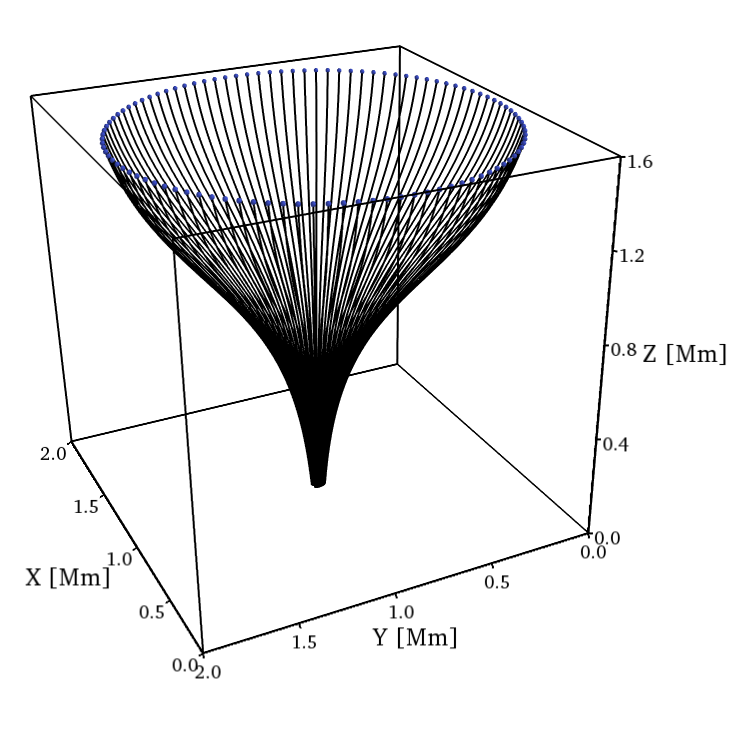

In [12]:
pd_seeds = ttf.make_circle_seeds(100, 60, **domain)
fieldlines, surface = ttf.create_flux_surface(bfield.outputs[0], pd_seeds)
surface.output.lines = None
flux_surface = mlab.pipeline.surface(surface.output)
flux_surface.actor.mapper.scalar_visibility = False
flux_surface.actor.property.color = (0.8,0.8,0.8)
#flux_surface.actor.property.line_width = 0

mlab_view(fig.scene)

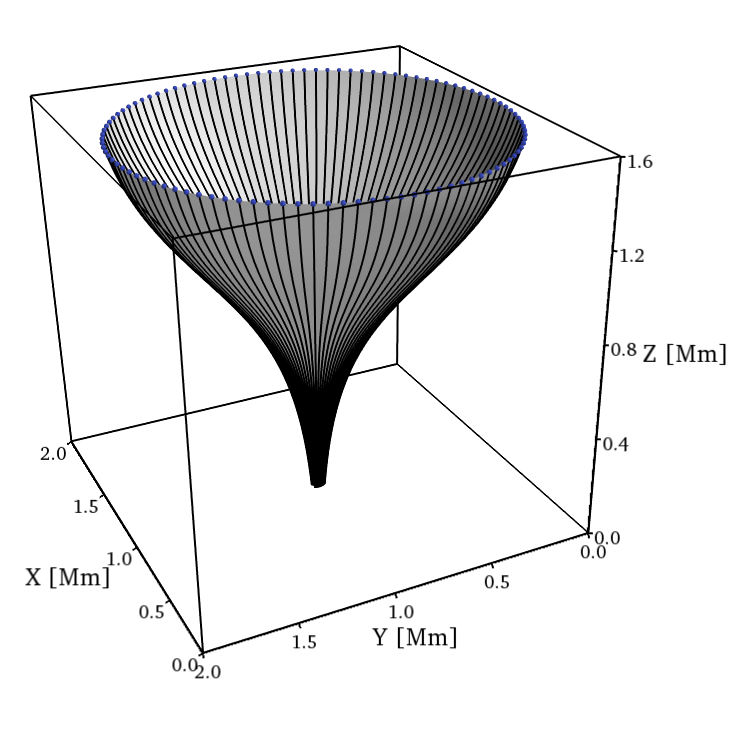

In [13]:
axes.visible = False
outline.visible = False
flux_surface.actor.property.edge_visibility = True
mlab_view(fig.scene, azimuth = 90, elevation = 75, distance=80, focalpoint=[63, 120, 110], aa=20)

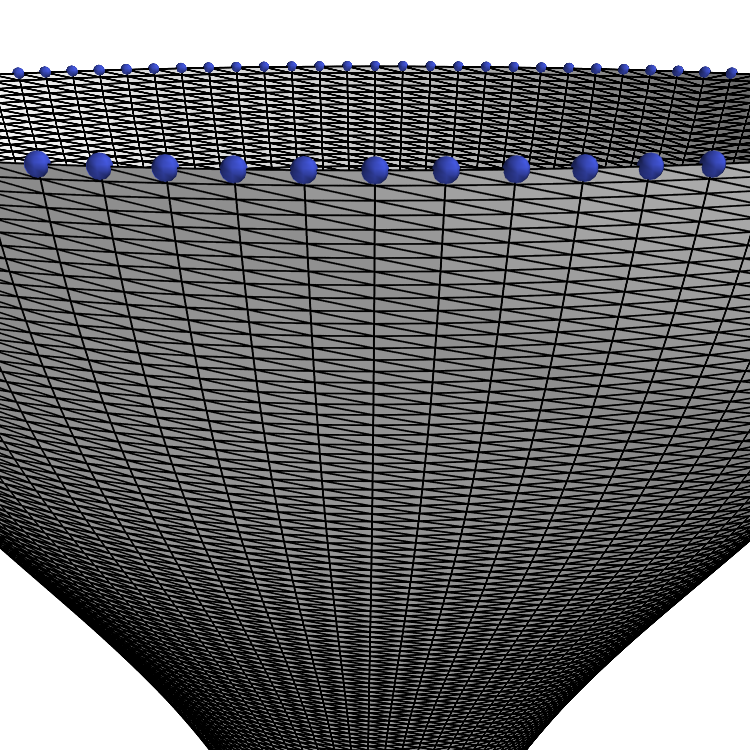

In [14]:
poly_norms = ttf.make_poly_norms(surface.output)
normvec = mlab.pipeline.glyph(poly_norms.output)
normvec.glyph.glyph_source.glyph_source = normvec.glyph.glyph_source.glyph_dict['arrow_source']
normvec.glyph.glyph.scale_mode = 'data_scaling_off'
normvec.glyph.glyph.color_mode = 'color_by_scale'
normvec.glyph.glyph.scale_factor = 5
normvec.glyph.glyph_source.glyph_position = 'tail'

mlab_view(fig.scene, azimuth=85, elevation=80, distance=50, focalpoint=[63, 120, 110], aa=20)

# MHD Waves excited by Different Photospheric Drivers

## Chapter 4

# Driving Waves in the Simulation Domain

$$
V_{(x,y,z)} = F_{(x,y,z)} \ e^{-\left(\frac{z^2}{\Delta z^2} + \frac{x^2}{\Delta x^2} + \frac{y^2}{\Delta y^2}\right)} \sin \left(2\pi \frac{t}{P}\right)
$$

## Uniform Driver

$$
F(x) = A \frac{y}{\sqrt{x^2 + y^2}},\\
F(y) = - A \frac{x}{\sqrt{x^2 + y^2}},
$$

## Archmedian Spiral
$$
F(x) = A \frac{B_Ax}{x^2 + y^2} \frac{y}{\sqrt{x^2 + y^2}},\\
F(y) = - A \frac{B_Ay}{x^2 + y^2} \frac{x}{\sqrt{x^2 + y^2}}.
$$

## Logarithmic Spiral
$$
F(x) = A \frac{\cos(\theta + \phi)}{\sqrt{x^2 + y^2}},\\
F(y) = - A \frac{\sin(\theta + \phi)}{\sqrt{x^2 + y^2}},\\
$$
where,
$\theta = \tan^{-1}\left(\frac{y}{x}\right),\ \phi = \tan^{-1}\left(\frac{1}{B_L}\right)$


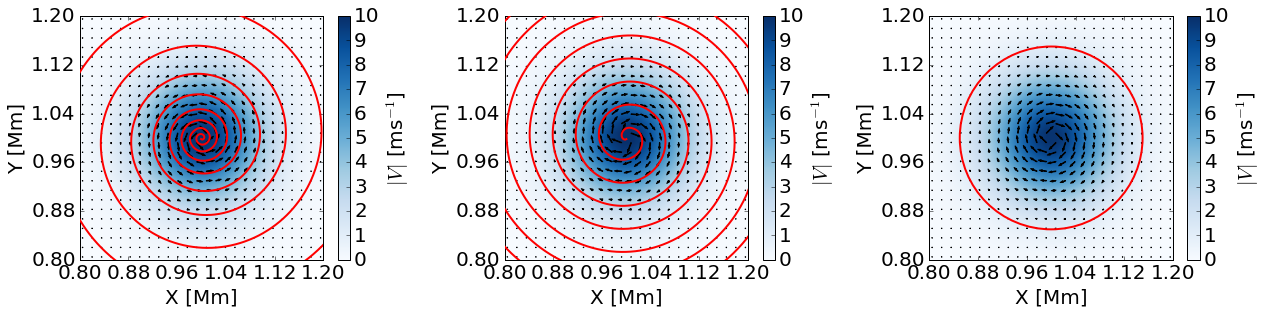

In [18]:
from streamlines import Streamlines
#Use Equation 1 to calculate the vector field in a 2D plane to plot it.
time = np.linspace(0,60,480)
dt = time[1:] - time [:-1]
period = 240.

x = np.linspace(7812.5,1992187.5,128)
y = np.linspace(7812.5,1992187.5,128)

x_max = x.max()
y_max = y.max()

xc = 1.0e6
yc = 1.0e6

xn = x - xc
yn = y - yc

delta_x=0.1e6
delta_y=0.1e6

xx, yy = np.meshgrid(xn,yn)
exp_y = np.exp(-(yn**2.0/delta_y**2.0))
exp_x = np.exp(-(xn**2.0/delta_x**2.0))

exp_x2, exp_y2= np.meshgrid(exp_x,exp_y)
exp_xyz = exp_x2 * exp_y2


#==============================================================================
# Define Driver Equations and Parameters
#==============================================================================
#A is the amplitude, B is the spiral expansion factor
A = 10

#Tdamp defines the damping of the driver with time, Tdep is the ocillator
tdamp = lambda time1: 1.0 #*np.exp(-(time1/(period)))
tdep = lambda time1: np.sin((time1*2.0*np.pi)/period) * tdamp(time1)

#Define a peak index to use for scaling in the inital frame
max_ind = np.argmax(tdep(time) > 0.9998)

def log():
    B = 0.05
    phi = np.arctan2(1,B)
    theta = np.arctan2(yy,xx)

    uy = np.sin(theta + phi)
    ux =  np.cos(theta + phi)

    vx = lambda time1: (ux / np.sqrt(ux**2 + uy**2)) * exp_xyz * tdep(time1) * A
    vy = lambda time1: (uy / np.sqrt(ux**2 + uy**2)) * exp_xyz * tdep(time1) * A

    vv = np.sqrt(vx(time[max_ind])**2 + vy(time[max_ind])**2)

    return vx, vy, vv

def arch():
    B = 0.005
    r = np.sqrt(xx**2 + yy**2)

    vx = lambda time1: ( (B*1e6 * xx) / (xx**2 + yy**2) + yy/r ) * exp_xyz * tdep(time1) * A
    vy = lambda time1: ( (B*1e6 * yy) / (xx**2 + yy**2) - xx/r ) * exp_xyz * tdep(time1) * A

    vv = np.sqrt(vx(time[max_ind])**2 + vy(time[max_ind])**2)

    return vx, vy, vv

def uniform():
    #Uniform
    vx = lambda time1: A * (yy / np.sqrt(xx**2 + yy**2)) * exp_xyz * tdep(time1)
    vy = lambda time1: A * (-xx / np.sqrt(xx**2 + yy**2)) * exp_xyz * tdep(time1)
    vv = np.sqrt(vx(time[max_ind])**2 + vy(time[max_ind])**2)
    
    return vx, vy, vv

drivers = [log, arch, uniform]

fig, axs = plt.subplots(1, 3, figsize=(18,9))
figwidth = 0.7
for driver_func, ax in zip(drivers, axs):
    #============================================================================
    # Do the Plotting
    #============================================================================
    vx, vy, vv = driver_func()
    # Calculate Streamline
    slines = Streamlines(x,y,vx(time[max_ind]),vy(time[max_ind]),maxLen=7000,
                         x0=xc, y0=yc, direction='forwards')

    im = ax.imshow(vv, cmap='Blues', extent=[7812.5,x_max,7812.5,y_max])
    im.set_norm(matplotlib.colors.Normalize(vmin=0,vmax=A))
    #ax.hold()
    
    if driver_func != uniform:
        Sline, = ax.plot(slines.streamlines[0][0],slines.streamlines[0][1],color='red',linewidth=2, zorder=40)
    else:
        Sline = matplotlib.patches.Circle([1e6, 1e6], radius=.15e6, fill=False, color='red', linewidth=2, zorder=40)
        ax.add_artist(Sline)

    #Add colourbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    cbar = plt.colorbar(im,cax)
    cbar.set_label(r"$|V|$ [ms$^{-1}$]")
    scalar = matplotlib.ticker.ScalarFormatter(useMathText=False,useOffset=False)
    scalar.set_powerlimits((-3,3))
    cbar.formatter = scalar
    cbar.ax.yaxis.get_offset_text().set_visible(True)
    cbar.update_ticks()
    #cbar.solids.set_rasterized(True)
    cbar.solids.set_edgecolor("face")

    #Add quiver plot overlay
    qu = ax.quiver(x, y, vx(time[max_ind]), vy(time[max_ind]), scale=25*A, color='k', zorder=20, linewidth=1)
    ax.axis([8.0e5,12.0e5,8.0e5,12.0e5])

    ax.xaxis.set_major_formatter(scalar)
    ax.yaxis.set_major_formatter(scalar)
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
    ax.xaxis.get_offset_text().set_visible(False)
    ax.yaxis.get_offset_text().set_visible(False)
    ax.set_xlabel("X [Mm]")
    ax.set_ylabel("Y [Mm]")

plt.tight_layout()
fig

# Analysis and Results

*Maybe the YouTube vido here, or some other vid if I can find / make one.*

# Time-Distance Diagrams

In [16]:
import td_plotting_helpers as ph
import time_distance_plots as tdp
from matplotlib.image import NonUniformImage
import texfigure
ch4 = texfigure.Manager(None, number=4, base_path='/home/stuart/GitHub/Thesis/thesis/Chapter4/')

figsize = (9,7)

pflux_labels = {'par_label':r'$V_\parallel[$ ms$^{-1}$]', 
                'perp_label':r'$V_\perp$ [ms$^{-1}$]',
                'phi_label':r'$V_\phi$ [ms$^{-1}$]'}

post_amp = "A10"
period = "p240"
tube_r = 'r30'
drivers = ['horiz', 'vert', 'Suni', 'Sarch', 'Slog']
exp_facs = [None, None, 'B0', 'B0005', 'B005']
captions = ['Horizontal', 'Vertical', 'Circular', 'Archemedian Spiral', 'Logarithmic Spiral']

figures = {}

for j, (driver, exp_fac, caption) in enumerate(zip(drivers, exp_facs, captions)):
    
    all_times, y, all_spoints = tdp.get_xy(ch4.data_dir, driver, period, post_amp, tube_r, exp_fac)
    data, beta_line = tdp.get_data(ch4.data_dir, driver, period, post_amp, tube_r, exp_fac)
    va_line, cs_line = tdp.get_speeds(ch4.data_dir, driver, period, post_amp, tube_r, exp_fac)
    
    fd = lambda args: [a.T for a in args]
       
    ph.xxlim = -150
    
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=figsize)
    ph.triple_plot(axes, all_times, y, *fd(data), beta_line=1./beta_line,
                   levels=[1.,3.,5.,7.,10.,100.], manual_locations=False, **pflux_labels)
    
    for ax in axes:
        ph.add_phase_speeds(ax, all_times, y, va_line, cs_line, dx_scale=1e6, color='g')
        
    #Remove the top two x labels
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    fig.tight_layout(h_pad=0.05)
    figures[driver] = fig

/opt/miniconda/envs/thesis/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Vertical Driver

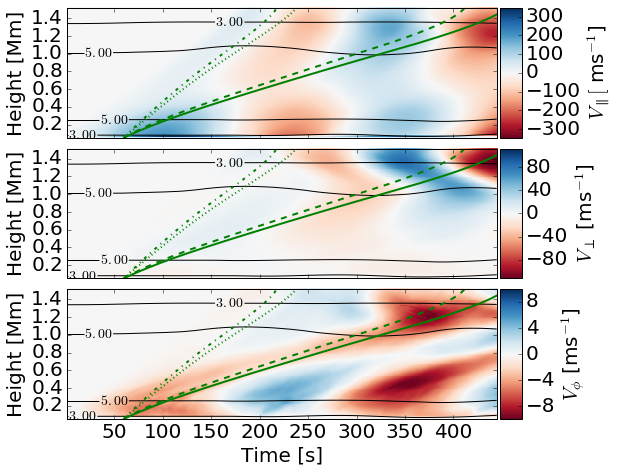

In [19]:
figures['vert']

# Horizontal Driver

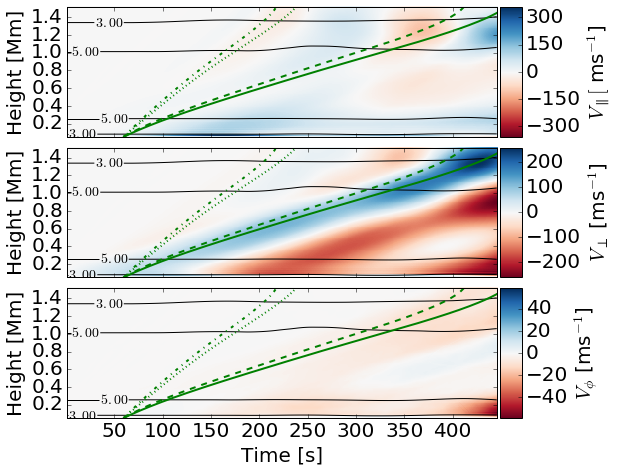

In [20]:
figures['horiz']

# Circular Driver

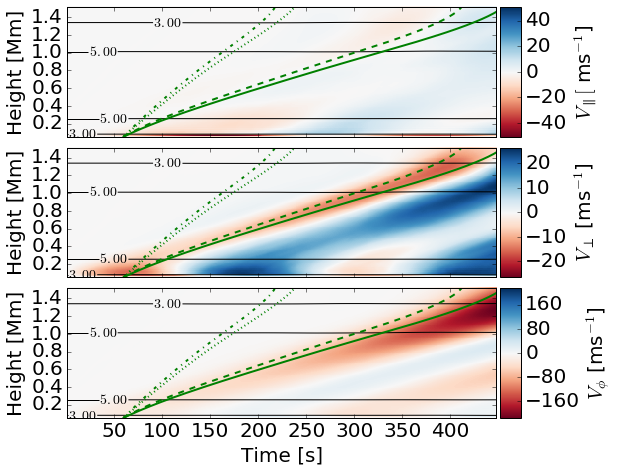

In [22]:
figures['Suni']

# Archemedian Spiral

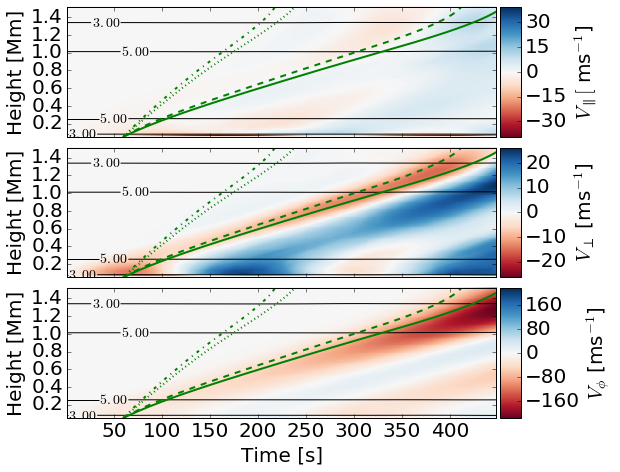

In [21]:
figures['Sarch']

# Logarithmic Spiral

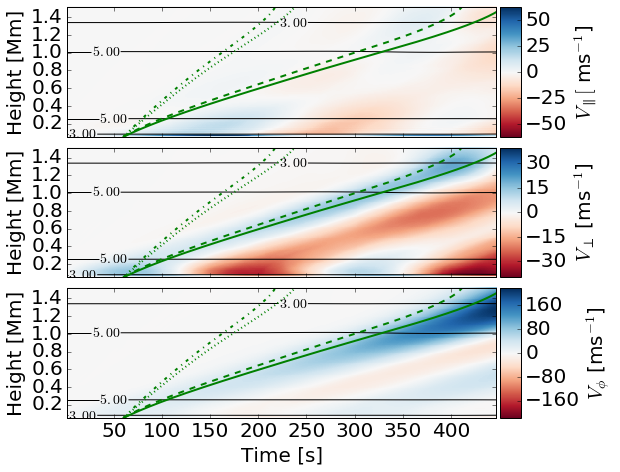

In [23]:
figures['Slog']

# Effects of Expansion Factor on Logarithmic Spiral MHD Wave Excitation

## Chapter 5

# Effects of Period on MHD Wave Generation from a Logarithmic Spiral Driver

## Chapter 6

# Conclusions

# Bibliography


<div class="cite2c-biblio"></div>